# Advanced House Price Prediction Analysis

**Building on Simple Linear Regression - Next Steps**

This notebook demonstrates advanced techniques to improve upon the basic simple linear regression model:

## 🎯 Improvements Covered:
1. **Multiple Linear Regression** - Using all available features
2. **Feature Engineering** - Creating new meaningful features
3. **Cross-Validation** - Better model evaluation
4. **Polynomial Features** - Capturing non-linear relationships
5. **Regularization** - Ridge and Lasso regression
6. **Model Comparison** - Comparing different approaches
7. **Feature Importance** - Understanding what matters most

In [1]:
# Enhanced imports for advanced analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Advanced ML tools
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Statistical tools
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Advanced libraries imported successfully!")

✅ Advanced libraries imported successfully!


## Step 1: Load and Prepare Enhanced Dataset

In [2]:
# Load the Housing dataset
try:
    df = pd.read_csv('Housing.csv')
    print(f"✅ Loaded {len(df)} records from Housing.csv")
except FileNotFoundError:
    print("❌ Housing.csv not found. Please download from Kaggle.")
    # Create sample data as fallback
    np.random.seed(42)
    n = 500
    df = pd.DataFrame({
        'price': np.random.normal(8000000, 2000000, n),
        'area': np.random.normal(7000, 2000, n),
        'bedrooms': np.random.choice([2, 3, 4, 5], n),
        'bathrooms': np.random.choice([1, 2, 3], n),
        'stories': np.random.choice([1, 2, 3, 4], n),
        'mainroad': np.random.choice(['yes', 'no'], n),
        'guestroom': np.random.choice(['yes', 'no'], n),
        'basement': np.random.choice(['yes', 'no'], n),
        'hotwaterheating': np.random.choice(['yes', 'no'], n),
        'airconditioning': np.random.choice(['yes', 'no'], n),
        'parking': np.random.choice([0, 1, 2, 3], n),
        'prefarea': np.random.choice(['yes', 'no'], n),
        'furnishingstatus': np.random.choice(['furnished', 'semi-furnished', 'unfurnished'], n)
    })
    print(f"✅ Created sample dataset with {len(df)} records")

print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

✅ Loaded 545 records from Housing.csv

Dataset shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Step 2: Multiple Linear Regression - Using All Features

In [3]:
# Prepare data for multiple linear regression
df_processed = df.copy()

# Handle categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']

# Convert yes/no to 1/0
for col in categorical_cols[:-1]:  # All except furnishingstatus
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# Handle furnishingstatus with label encoding
if 'furnishingstatus' in df_processed.columns:
    le = LabelEncoder()
    df_processed['furnishingstatus'] = le.fit_transform(df_processed['furnishingstatus'])
    print(f"Furnishing status mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Separate features and target
X = df_processed.drop('price', axis=1)
y = df_processed['price']

print(f"\n📊 Features for multiple regression: {list(X.columns)}")
print(f"Target variable: price")
print(f"Feature matrix shape: {X.shape}")

Furnishing status mapping: {'furnished': np.int64(0), 'semi-furnished': np.int64(1), 'unfurnished': np.int64(2)}

📊 Features for multiple regression: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Target variable: price
Feature matrix shape: (545, 12)


In [4]:
# Split data for proper evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Train multiple linear regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\n=== MULTIPLE LINEAR REGRESSION RESULTS ===")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr_model.coef_,
    'Abs_Coefficient': np.abs(mlr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n📊 Feature Importance (by coefficient magnitude):")
print(feature_importance)

Training set: 436 samples
Test set: 109 samples

=== MULTIPLE LINEAR REGRESSION RESULTS ===
Training R²: 0.6854
Test R²: 0.6495
Training RMSE: 984836.44
Test RMSE: 1331071.42

📊 Feature Importance (by coefficient magnitude):
             Feature   Coefficient  Abs_Coefficient
2          bathrooms  1.097117e+06     1.097117e+06
8    airconditioning  7.855506e+05     7.855506e+05
7    hotwaterheating  6.878813e+05     6.878813e+05
10          prefarea  6.299017e+05     6.299017e+05
3            stories  4.062232e+05     4.062232e+05
6           basement  3.931598e+05     3.931598e+05
4           mainroad  3.668242e+05     3.668242e+05
5          guestroom  2.331468e+05     2.331468e+05
9            parking  2.257565e+05     2.257565e+05
11  furnishingstatus -2.103971e+05     2.103971e+05
1           bedrooms  7.857449e+04     7.857449e+04
0               area  2.358488e+02     2.358488e+02


## Step 3: Feature Engineering - Creating New Features

In [5]:
# Create enhanced features
X_enhanced = X.copy()

# Feature engineering
if 'area' in X_enhanced.columns and 'bedrooms' in X_enhanced.columns:
    X_enhanced['area_per_bedroom'] = X_enhanced['area'] / (X_enhanced['bedrooms'] + 1)  # +1 to avoid division by zero

if 'area' in X_enhanced.columns and 'bathrooms' in X_enhanced.columns:
    X_enhanced['area_per_bathroom'] = X_enhanced['area'] / (X_enhanced['bathrooms'] + 1)

if 'bedrooms' in X_enhanced.columns and 'bathrooms' in X_enhanced.columns:
    X_enhanced['bedroom_bathroom_ratio'] = X_enhanced['bedrooms'] / (X_enhanced['bathrooms'] + 1)

if 'area' in X_enhanced.columns:
    X_enhanced['area_squared'] = X_enhanced['area'] ** 2
    X_enhanced['area_log'] = np.log(X_enhanced['area'] + 1)

# Total amenities score
amenity_cols = ['guestroom', 'basement', 'hotwaterheating', 'airconditioning']
available_amenities = [col for col in amenity_cols if col in X_enhanced.columns]
if available_amenities:
    X_enhanced['total_amenities'] = X_enhanced[available_amenities].sum(axis=1)

print(f"\n🔧 Enhanced features created:")
new_features = [col for col in X_enhanced.columns if col not in X.columns]
print(f"New features: {new_features}")
print(f"Total features: {X_enhanced.shape[1]} (was {X.shape[1]})")

# Train model with enhanced features
X_enh_train, X_enh_test, y_enh_train, y_enh_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=42)

mlr_enhanced = LinearRegression()
mlr_enhanced.fit(X_enh_train, y_enh_train)

y_enh_pred = mlr_enhanced.predict(X_enh_test)
enhanced_r2 = r2_score(y_enh_test, y_enh_pred)
enhanced_rmse = np.sqrt(mean_squared_error(y_enh_test, y_enh_pred))

print(f"\n=== ENHANCED MODEL RESULTS ===")
print(f"Enhanced Model R²: {enhanced_r2:.4f}")
print(f"Enhanced Model RMSE: {enhanced_rmse:.2f}")
print(f"Improvement in R²: {enhanced_r2 - test_r2:.4f}")


🔧 Enhanced features created:
New features: ['area_per_bedroom', 'area_per_bathroom', 'bedroom_bathroom_ratio', 'area_squared', 'area_log', 'total_amenities']
Total features: 18 (was 12)

=== ENHANCED MODEL RESULTS ===
Enhanced Model R²: 0.6554
Enhanced Model RMSE: 1319688.04
Improvement in R²: 0.0060


## Step 4: Cross-Validation for Better Evaluation

=== CROSS-VALIDATION RESULTS (5-fold) ===
Simple (Area only):
  Mean R²: -17.5319 (±10.9649)
  Individual scores: [ -4.48747915  -8.93725564 -15.94730772 -35.66059689 -22.62706961]

Multiple Features:
  Mean R²: -9.9107 (±7.4065)
  Individual scores: [ -1.94277003  -5.00707214 -16.22431367 -21.10749485  -5.27173317]

Enhanced Features:
  Mean R²: -9.3373 (±6.6754)
  Individual scores: [ -1.95686777  -4.85739057 -15.86403626 -18.76580861  -5.24242365]



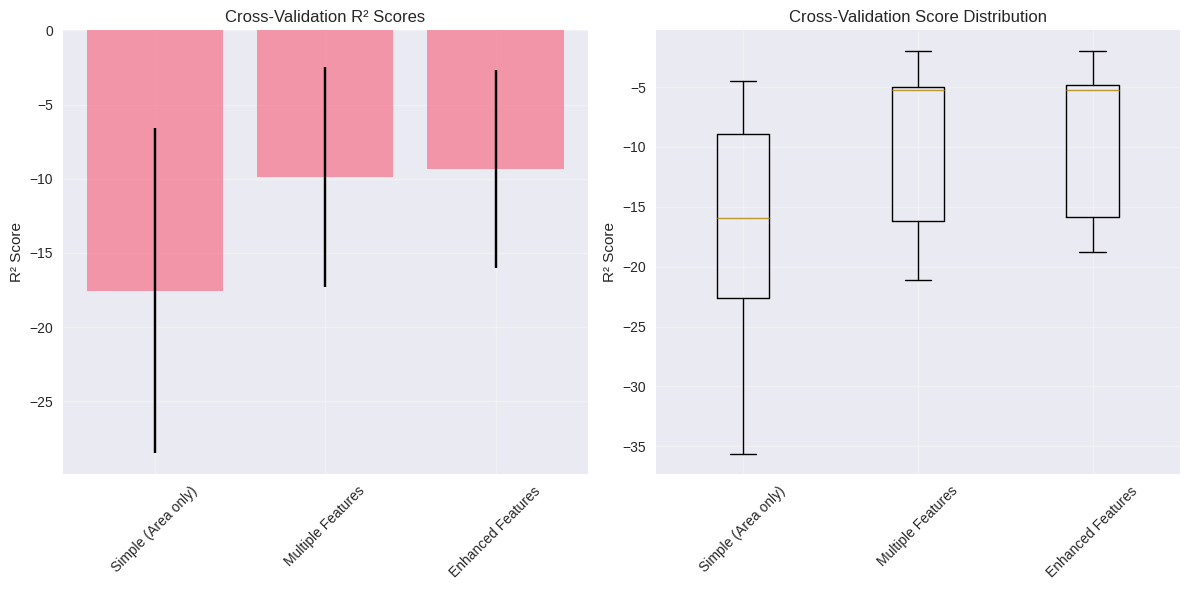

In [6]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

# Compare models using cross-validation
models = {
    'Simple (Area only)': LinearRegression(),
    'Multiple Features': LinearRegression(),
    'Enhanced Features': LinearRegression()
}

datasets = {
    'Simple (Area only)': X[['area']] if 'area' in X.columns else X.iloc[:, :1],
    'Multiple Features': X,
    'Enhanced Features': X_enhanced
}

cv_results = {}

print("=== CROSS-VALIDATION RESULTS (5-fold) ===")
for name, model in models.items():
    X_data = datasets[name]
    cv_scores = cross_val_score(model, X_data, y, cv=5, scoring='r2')
    cv_results[name] = {
        'mean': cv_scores.mean(),
        'std': cv_scores.std(),
        'scores': cv_scores
    }
    print(f"{name}:")
    print(f"  Mean R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print(f"  Individual scores: {cv_scores}")
    print()

# Visualize cross-validation results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
model_names = list(cv_results.keys())
means = [cv_results[name]['mean'] for name in model_names]
stds = [cv_results[name]['std'] for name in model_names]

plt.bar(model_names, means, yerr=stds, capsize=5, alpha=0.7)
plt.title('Cross-Validation R² Scores')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
all_scores = [cv_results[name]['scores'] for name in model_names]
plt.boxplot(all_scores, labels=model_names)
plt.title('Cross-Validation Score Distribution')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Regularization - Ridge and Lasso Regression

In [7]:
# Standardize features for regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enhanced)
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Ridge Regression with hyperparameter tuning
ridge_alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_scores = []

for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')
    ridge_scores.append(scores.mean())

best_ridge_alpha = ridge_alphas[np.argmax(ridge_scores)]
print(f"Best Ridge alpha: {best_ridge_alpha}")

# Lasso Regression with hyperparameter tuning
lasso_alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
lasso_scores = []

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=2000)
    scores = cross_val_score(lasso, X_scaled, y, cv=5, scoring='r2')
    lasso_scores.append(scores.mean())

best_lasso_alpha = lasso_alphas[np.argmax(lasso_scores)]
print(f"Best Lasso alpha: {best_lasso_alpha}")

# Train final regularized models
ridge_final = Ridge(alpha=best_ridge_alpha)
lasso_final = Lasso(alpha=best_lasso_alpha, max_iter=2000)

ridge_final.fit(X_scaled_train, y_scaled_train)
lasso_final.fit(X_scaled_train, y_scaled_train)

# Evaluate regularized models
ridge_pred = ridge_final.predict(X_scaled_test)
lasso_pred = lasso_final.predict(X_scaled_test)

ridge_r2 = r2_score(y_scaled_test, ridge_pred)
lasso_r2 = r2_score(y_scaled_test, lasso_pred)

print(f"\n=== REGULARIZATION RESULTS ===")
print(f"Ridge Regression R²: {ridge_r2:.4f}")
print(f"Lasso Regression R²: {lasso_r2:.4f}")

# Feature selection by Lasso
feature_names = X_enhanced.columns
lasso_coefs = lasso_final.coef_
selected_features = feature_names[lasso_coefs != 0]

print(f"\n🎯 Features selected by Lasso ({len(selected_features)}/{len(feature_names)}):")
for feature in selected_features:
    coef = lasso_coefs[feature_names.get_loc(feature)]
    print(f"  {feature}: {coef:.2f}")

Best Ridge alpha: 100.0
Best Lasso alpha: 1000.0

=== REGULARIZATION RESULTS ===
Ridge Regression R²: 0.6367
Lasso Regression R²: 0.6543

🎯 Features selected by Lasso (17/18):
  area: 179906.81
  bedrooms: -46695.12
  bathrooms: 230442.46
  stories: 334841.91
  mainroad: 76063.62
  basement: 161979.38
  hotwaterheating: 123050.57
  airconditioning: 290570.42
  parking: 196374.63
  prefarea: 293618.00
  furnishingstatus: -181444.86
  area_per_bedroom: -185608.65
  area_per_bathroom: -740595.67
  bedroom_bathroom_ratio: 29237.68
  area_squared: 316041.71
  area_log: 991147.67
  total_amenities: 103645.75


## Step 6: Polynomial Features - Capturing Non-Linear Relationships

In [8]:
# Create polynomial features (degree 2) for key numeric features
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
available_numeric = [col for col in numeric_features if col in X.columns]

if available_numeric:
    # Use only key numeric features to avoid too many polynomial terms
    X_numeric = X[available_numeric]
    
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
    X_poly = poly.fit_transform(X_numeric)
    
    # Get feature names
    poly_feature_names = poly.get_feature_names_out(available_numeric)
    
    print(f"\n🔢 Polynomial Features Created:")
    print(f"Original features: {len(available_numeric)}")
    print(f"Polynomial features: {X_poly.shape[1]}")
    print(f"Sample polynomial features: {list(poly_feature_names[:10])}")
    
    # Train polynomial model
    X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
        X_poly, y, test_size=0.2, random_state=42
    )
    
    # Scale polynomial features
    poly_scaler = StandardScaler()
    X_poly_train_scaled = poly_scaler.fit_transform(X_poly_train)
    X_poly_test_scaled = poly_scaler.transform(X_poly_test)
    
    # Use Ridge regression to handle multicollinearity
    poly_model = Ridge(alpha=10.0)
    poly_model.fit(X_poly_train_scaled, y_poly_train)
    
    poly_pred = poly_model.predict(X_poly_test_scaled)
    poly_r2 = r2_score(y_poly_test, poly_pred)
    poly_rmse = np.sqrt(mean_squared_error(y_poly_test, poly_pred))
    
    print(f"\n=== POLYNOMIAL REGRESSION RESULTS ===")
    print(f"Polynomial Model R²: {poly_r2:.4f}")
    print(f"Polynomial Model RMSE: {poly_rmse:.2f}")
else:
    print("⚠️ No suitable numeric features found for polynomial regression")
    poly_r2 = 0


🔢 Polynomial Features Created:
Original features: 5
Polynomial features: 20
Sample polynomial features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'area^2', 'area bedrooms', 'area bathrooms', 'area stories', 'area parking']

=== POLYNOMIAL REGRESSION RESULTS ===
Polynomial Model R²: 0.5547
Polynomial Model RMSE: 1500333.97


## Step 7: Advanced Model - Random Forest

In [9]:
# Random Forest for comparison
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_enh_train, y_enh_train)

rf_pred = rf_model.predict(X_enh_test)
rf_r2 = r2_score(y_enh_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_enh_test, rf_pred))

print(f"=== RANDOM FOREST RESULTS ===")
print(f"Random Forest R²: {rf_r2:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")

# Feature importance from Random Forest
rf_importance = pd.DataFrame({
    'Feature': X_enhanced.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🌳 Random Forest Feature Importance:")
print(rf_importance.head(10))

=== RANDOM FOREST RESULTS ===
Random Forest R²: 0.6351
Random Forest RMSE: 1358037.74

🌳 Random Forest Feature Importance:
              Feature  Importance
16           area_log    0.151379
0                area    0.151101
15       area_squared    0.133828
2           bathrooms    0.109705
13  area_per_bathroom    0.068188
17    total_amenities    0.060663
12   area_per_bedroom    0.048042
9             parking    0.047680
3             stories    0.044978
8     airconditioning    0.044532


## Step 8: Model Comparison and Final Results


                 FINAL MODEL COMPARISON
                     Model   R² Score              Complexity
          Lasso Regression   0.654267 Low (Feature Selection)
          Ridge Regression   0.636739                  Medium
             Random Forest   0.635129                    High
       Polynomial Features   0.554660                    High
         Enhanced Features  -9.337305                  Medium
Multiple Linear Regression  -9.910677                  Medium
 Simple Linear (Area only) -17.531942                     Low


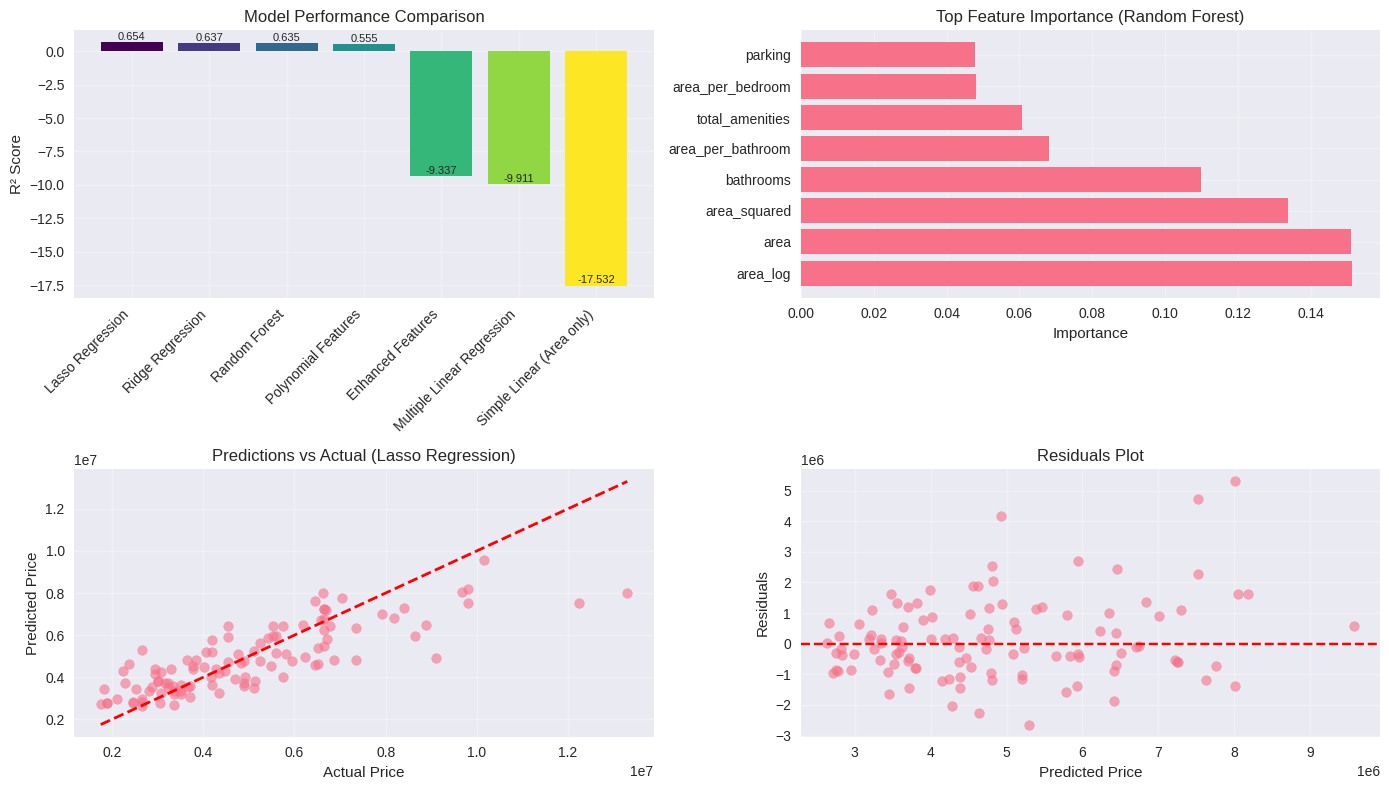


🎯 RECOMMENDATIONS:

1. Best performing model: Lasso Regression
   R² Score: 0.6543

2. Most important features:
   - area_log: 0.151
   - area: 0.151
   - area_squared: 0.134
   - bathrooms: 0.110
   - area_per_bathroom: 0.068

3. Model complexity vs performance trade-off:
   - Simple models: Good for interpretation
   - Complex models: Better performance but harder to interpret

4. Next steps for further improvement:
   - Collect more data
   - Engineer domain-specific features
   - Try ensemble methods
   - Hyperparameter optimization


In [10]:
# Compile all results
results_summary = pd.DataFrame({
    'Model': [
        'Simple Linear (Area only)',
        'Multiple Linear Regression',
        'Enhanced Features',
        'Ridge Regression',
        'Lasso Regression',
        'Polynomial Features',
        'Random Forest'
    ],
    'R² Score': [
        cv_results['Simple (Area only)']['mean'],
        cv_results['Multiple Features']['mean'],
        cv_results['Enhanced Features']['mean'],
        ridge_r2,
        lasso_r2,
        poly_r2,
        rf_r2
    ],
    'Complexity': [
        'Low',
        'Medium',
        'Medium',
        'Medium',
        'Low (Feature Selection)',
        'High',
        'High'
    ]
})

results_summary = results_summary.sort_values('R² Score', ascending=False)

print("\n" + "="*60)
print("                 FINAL MODEL COMPARISON")
print("="*60)
print(results_summary.to_string(index=False))

# Visualization of results
plt.figure(figsize=(14, 8))

# Model performance comparison
plt.subplot(2, 2, 1)
colors = plt.cm.viridis(np.linspace(0, 1, len(results_summary)))
bars = plt.bar(range(len(results_summary)), results_summary['R² Score'], color=colors)
plt.title('Model Performance Comparison')
plt.ylabel('R² Score')
plt.xticks(range(len(results_summary)), results_summary['Model'], rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Feature importance (Random Forest)
plt.subplot(2, 2, 2)
top_features = rf_importance.head(8)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.title('Top Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.grid(True, alpha=0.3)

# Prediction vs Actual (Best Model)
best_model_name = results_summary.iloc[0]['Model']
if 'Random Forest' in best_model_name:
    best_pred = rf_pred
    best_actual = y_enh_test
else:
    best_pred = y_test_pred
    best_actual = y_test

plt.subplot(2, 2, 3)
plt.scatter(best_actual, best_pred, alpha=0.6)
plt.plot([best_actual.min(), best_actual.max()], [best_actual.min(), best_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Predictions vs Actual ({best_model_name})')
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(2, 2, 4)
residuals = best_actual - best_pred
plt.scatter(best_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final recommendations
print(f"\n🎯 RECOMMENDATIONS:")
print(f"\n1. Best performing model: {results_summary.iloc[0]['Model']}")
print(f"   R² Score: {results_summary.iloc[0]['R² Score']:.4f}")
print(f"\n2. Most important features:")
for i, row in rf_importance.head(5).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.3f}")
print(f"\n3. Model complexity vs performance trade-off:")
print(f"   - Simple models: Good for interpretation")
print(f"   - Complex models: Better performance but harder to interpret")
print(f"\n4. Next steps for further improvement:")
print(f"   - Collect more data")
print(f"   - Engineer domain-specific features")
print(f"   - Try ensemble methods")
print(f"   - Hyperparameter optimization")